In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_Forest_Fires_Cleaned.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
## Basic Simple Pre-Check
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
## Dropping the month day and year columns
df.drop(['month', 'day', 'year'], axis=1, inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Encoding The Classes column
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
## Divide features into Independent and Dependent Features
X = df.drop('FWI', axis=1)
y = df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [14]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [17]:
## Feature Selection based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

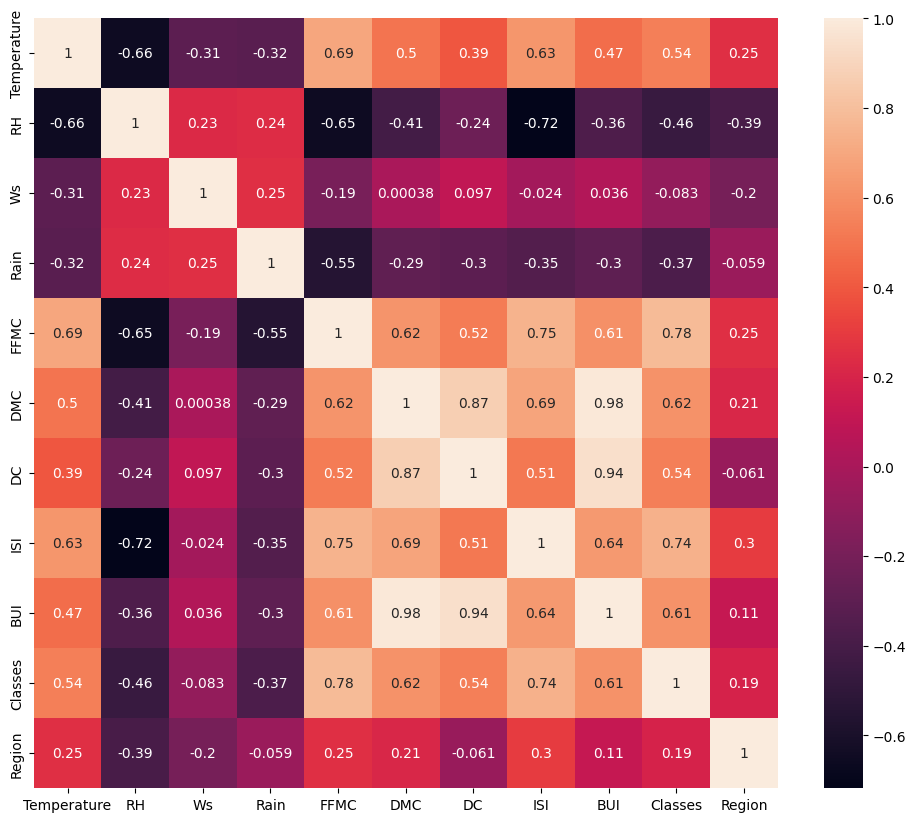

In [18]:
## Checking for the multicollinearity
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [19]:
from pandas import DataFrame

## This function will return the columns that are highly correlated
def correlation(dataset: DataFrame, threshold: float) -> set:
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
## Threshold should be set by the Domain Experts (But this is good fun project so I will set it to 0.85)
cor_feats = correlation(X_train, 0.85)

In [21]:
## Dropping the highly correlated columns
X_train.drop(cor_feats, axis=1, inplace=True)
X_test.drop(cor_feats, axis=1, inplace=True)

In [22]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [23]:
## Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled[:5]

array([[-0.84284248,  0.78307967,  1.29972026, -0.33727373, -0.12805583,
        -0.88272888, -0.62963326, -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, -0.29048728, -1.21758569,
        -0.86687565, -0.93058524, -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, -0.38406017,  1.15703067,
         0.61540157,  2.7271388 ,  0.90553851,  1.01105006],
       [-0.03121639, -0.15191892,  0.9200267 , -0.24370083, -0.03726168,
        -0.27237944, -0.60648311, -1.10431526, -0.98907071],
       [-0.03121639, -1.0201319 , -0.59874754, -0.05655505, -0.00932501,
        -0.60529731, -0.69908371, -1.10431526, -0.98907071]])

<Axes: title={'center': 'After Scaling'}>

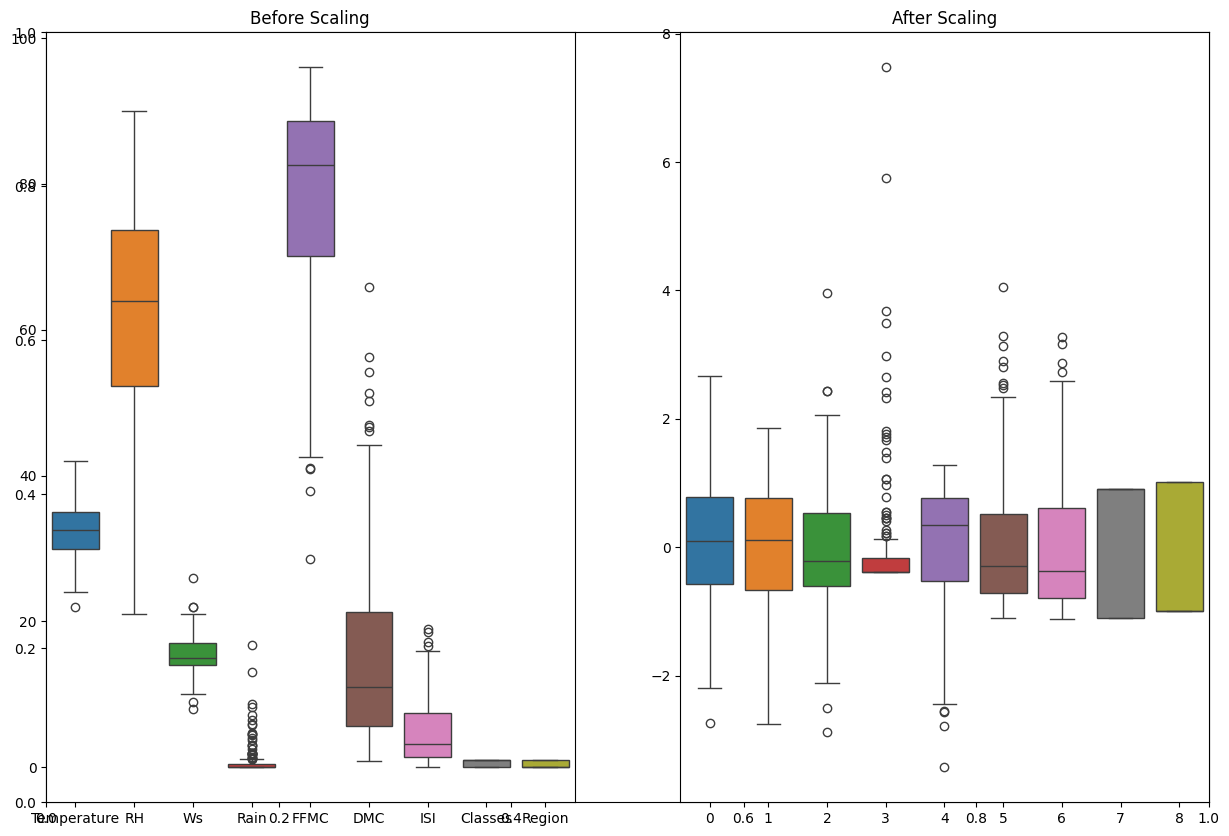

In [26]:
## Box plots to see the effect of scaling
plt.subplots(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title('Before Scaling')
sns.boxplot(data=X_train)
plt.subplot(1, 2, 2)
plt.title('After Scaling')
sns.boxplot(data=X_train_scaled)

In [27]:
## Generic method to check the performance of the model and plot the results
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_performance(y_test, y_pred) -> None:
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}')
    plt.figure(figsize=(7, 5))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')

## Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

Mean Squared Error: 0.6742766873791599
Mean Absolute Error: 0.5468236465249987
R2 Score: 0.9847657384266951


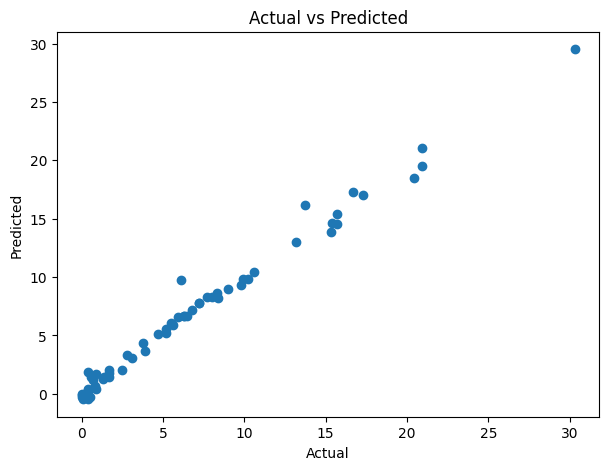

In [30]:
model_performance(y_test, y_pred)

## Lasso Regression Model

In [31]:
from sklearn.linear_model import Lasso

In [32]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

Mean Squared Error: 2.2483458918974764
Mean Absolute Error: 1.133175994914409
R2 Score: 0.9492020263112388


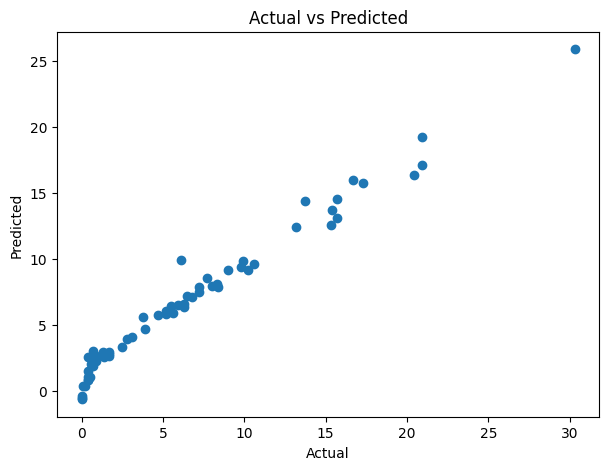

In [33]:
model_performance(y_test, y_pred)

## Ridge Regression Model

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

Mean Squared Error: 0.6949198918152099
Mean Absolute Error: 0.5642305340105713
R2 Score: 0.9842993364555512


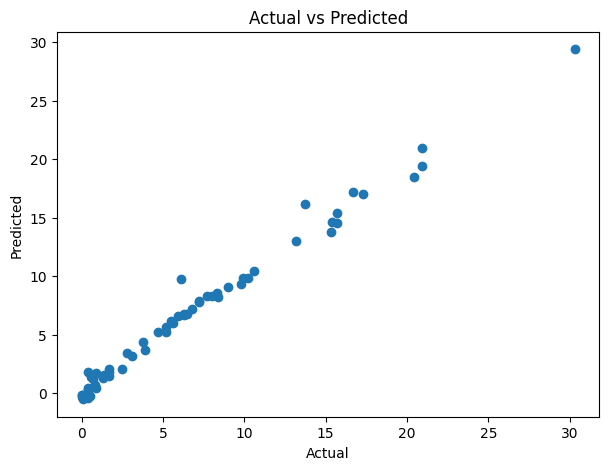

In [36]:
model_performance(y_test, y_pred)

## ElasticNet Regression Model

In [37]:
from sklearn.linear_model import ElasticNet

In [38]:
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred = elasticnet.predict(X_test_scaled)

Mean Squared Error: 5.517251101025224
Mean Absolute Error: 1.8822353634896
R2 Score: 0.8753460589519703


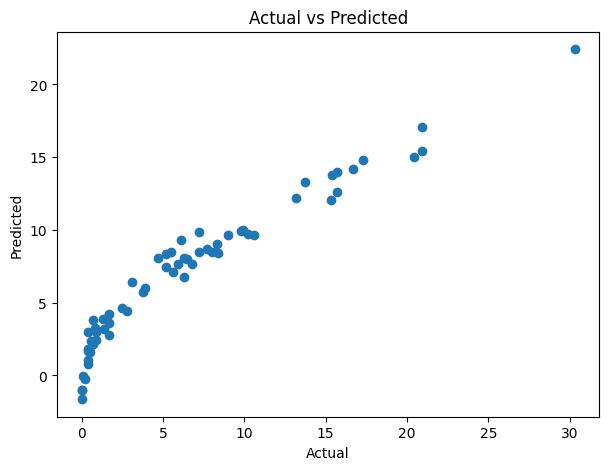

In [39]:
model_performance(y_test, y_pred)

## Cross Validation Lasso

In [40]:
from sklearn.linear_model import LassoCV

In [42]:
lassocv = LassoCV(cv=10)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)

In [44]:
lassocv.alpha_

np.float64(0.02849540750587511)

In [45]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [46]:
lassocv.mse_path_

array([[ 44.52386224,  59.69617615,  71.50869539,  62.03682757,
         50.40311475,  59.54844206, 114.63963567,  39.73446272,
         49.22294503,  36.24212463],
       [ 38.81809504,  53.24149163,  66.75178363,  56.60973381,
         43.8002798 ,  53.516829  , 114.58812339,  34.82008106,
         44.2751668 ,  32.19879781],
       [ 33.93243537,  47.48502068,  58.82958084,  51.79412005,
         37.75115087,  46.81491679, 104.29834117,  30.56897494,
         39.94834769,  28.67875221],
       [ 29.68093412,  41.70463257,  51.85003637,  47.51677033,
         32.51319652,  40.9240729 ,  95.20734518,  26.87045736,
         35.63580618,  25.32979186],
       [ 25.9811893 ,  36.60120202,  45.74962951,  43.19983553,
         28.07857457,  35.80044459,  87.16852681,  23.6526526 ,
         31.33628878,  21.48361375],
       [ 22.76140439,  32.14846959,  40.41593218,  38.17911921,
         24.33464544,  31.34420665,  80.05373076,  20.85297922,
         27.57962084,  18.18855152],
       [ 1

Mean Squared Error: 0.7146912045228991
Mean Absolute Error: 0.5721047420583082
R2 Score: 0.9838526335588409


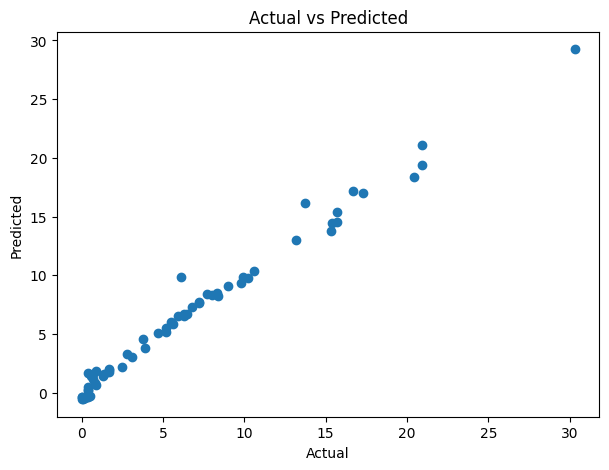

In [47]:
model_performance(y_test, y_pred)

## Ridge Regression CV

In [48]:
from sklearn.linear_model import RidgeCV

In [49]:
ridgecv = RidgeCV(cv=10)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)

In [50]:
ridgecv.alpha_

np.float64(1.0)

In [52]:
ridgecv.alphas

(0.1, 1.0, 10.0)

Mean Squared Error: 0.6949198918152099
Mean Absolute Error: 0.5642305340105713
R2 Score: 0.9842993364555512


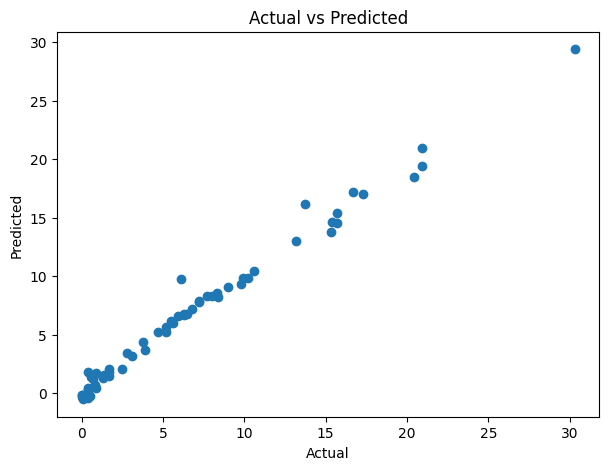

In [53]:
model_performance(y_test, y_pred)

## Elasticnet CV

In [55]:
from sklearn.linear_model import ElasticNetCV

In [56]:
elasticnetcv = ElasticNetCV(cv=10)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)

In [57]:
elasticnetcv.alpha_

np.float64(0.024669963340023145)

In [58]:
elasticnetcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

Mean Squared Error: 0.746854281746702
Mean Absolute Error: 0.6058027687913241
R2 Score: 0.9831259574915808


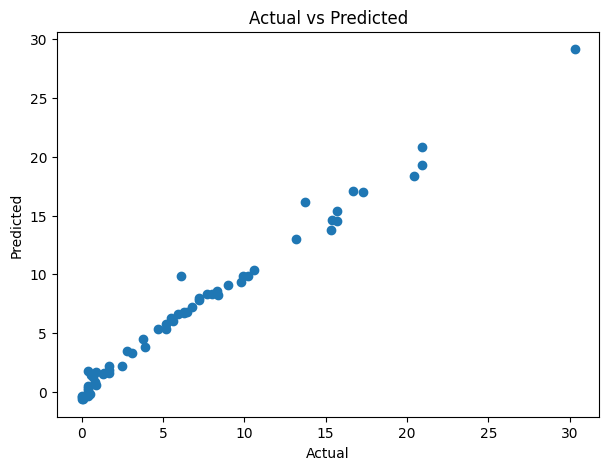

In [59]:
model_performance(y_test, y_pred)